## 7.1 风险评估模型效果评价方法

在这个项目中，我们将从准确性、稳定性、可解释性三个方面对模型进行评估。

- 准确性：准确性中包含两个指标，分别为受试者工作特征曲线（receiver operating characteristic curve，简称ROC曲线）和柯尔莫可洛夫-斯米洛夫检验（Kolmogorov-Smirnov test，简称KS检验），它们均为风控模型中的常用评估指标。ROC曲线通过真正率（True Positive Rate, TPR）和假正率（False Positive Rate, FPR）两个指标进行绘制。并且它与横轴之间的面积（area under of curve, 简称AUC）可以给出一个具体的数值来度量模型的准确性。ROC曲线具有一定的稳定性，它不会因为正负样本分布的变化而产生不同的曲线。 在统计学中，KS检验基于累计分布函数，用以检验两个经验分布是否不同或一个经验分布与另一个理想分布是否不同。在风控模型的开发中，KS检验可以评估风控模型对正常和违约用户的区分能力，是一种区分度评价指标。
- 稳定性：模型是在特定时间点开发的，是否对外部样本有效需要经过稳定性测试。群体稳定性指标（population stability index，PSI）是最常用的模型稳定性评价指标。
- 可解释性：在逻辑回归和随机森林模型中，考量各个解释变量对目标变量预测结果的影响程度，可以得到模型指标重要性。


## 7.2 利用 AUC 评估逻辑回归模型准确性 

在7.1中，我们对ROC曲线和AUC进行了简单的介绍，并且在上一部分中已经通过调节参数得到了最优的逻辑回归模型。这一节我们首先绘制出这个最优模型的ROC曲线，然后计算出AUC值，以此来评估其准确性。

首先我们需要从sklearn工具包中导入metrics函数，然后通过metrics中的roc_curve()计算绘制ROC曲线所必要的值，在括号内我们需填写测试集的真实标签和预测概率，最终这个函数将返回三部分内容，分别为：

- fpr: 假正(false positive)率
- tpr: 真正(true positive)率
- threshold: 用于计算fpr和tpr的阈值

接下来我们可以用metrics中的auc()进行AUC值的计算，其中括号内需按先后顺序填入刚才求出的fpr及tpr值，这个函数最终将返回浮点数形式的AUC值。

下一步我们用matplotlib工具包中的pyplot模块进行画图，其中横坐标为假正率（false positive rate），纵坐标为真正率（true positive rate），设置图例打出AUC的结果值，将图例放在右下角。为了对ROC曲线进行更好的观察，我们还需要设置横纵坐标的范围（0-1），并且还可以画一条红色的对角线（斜率）来与ROC曲线进行参照对比。最后设置横纵坐标的名称分别为False Positive Rate和True Positive Rate，并将图形命名为Receiver Operating Characteristic Curve。


## 实训任务

- 使用metrics.roc_curve函数计算出 fpr及tpr和threshold（测试集真实标签 y_test, 测试集预测概率y_predict_best）。
- 使用metrics.auc函数求出 AUC的值（在函数括号中按顺序填入fpr 及 tpr）。
- 将画ROC曲线的代码plt.plot填写完整（分别按顺序填入横坐标，纵坐标以及图例）。


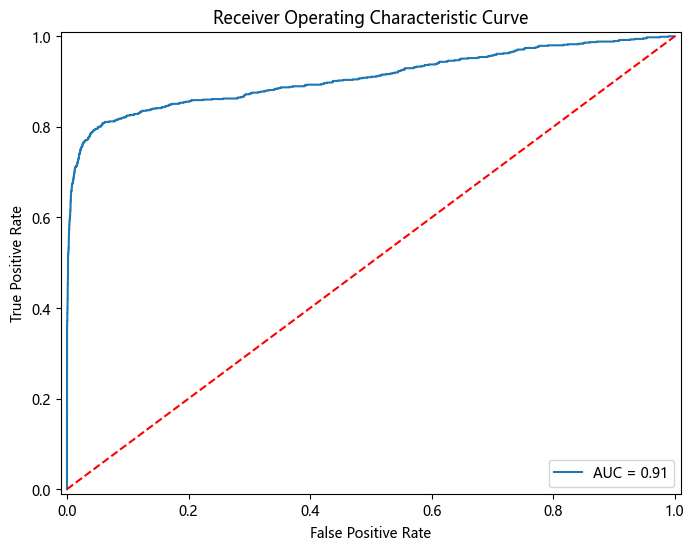

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import joblib
import pandas as pd
from sklearn import metrics

data = pd.read_table('dataset13.txt', sep='\t')
y = data['Default'].values
x = data.drop(['Default'], axis=1).values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=33, stratify=y)

# 使用 LogisticRegression 训练模型
lr = LogisticRegression()
lr.fit(x_train, y_train)

# 保存模型
joblib.dump(lr, "train_model.m")

# 加载模型
lr = joblib.load("train_model.m")
y_predict_proba = lr.predict_proba(x_test)
y_predict = lr.predict_proba(x_test)[:, 1]

# 用metrics.roc_curve()求出 fpr, tpr, threshold
fpr, tpr, threshold = metrics.roc_curve(y_test, y_predict)

# 用metrics.auc求出roc_auc的值
roc_auc = metrics.auc(fpr, tpr)

# 将图片大小设为8:6
fig, ax = plt.subplots(figsize=(8, 6))

# 将plt.plot里的内容填写完整
plt.plot(fpr, tpr, label='AUC = %0.2f' % roc_auc)

# 将图例显示在右下方
plt.legend(loc='lower right')

# 画出一条红色对角虚线
plt.plot([0, 1], [0, 1], 'r--')

# 设置横纵坐标轴范围
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])

# 设置横纵名称以及图形名称
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.show()


## 7.3 利用 AUC 评估随机森林模型准确性 

接下来我们查看一下在随机森林模型中的ROC曲线和AUC值，方法与逻辑回归相同。在上一部分中，我们已经将随机森林的参数调整至最优，接下来我们用这个最优模型画出ROC曲线。

## 实训任务

- 使用metrics.roc_curve函数计算出fpr及tpr和threshold（测试集真实标签 y_test, 测试集预测概率y_predict_best）。
- 使用metrics.auc函数求出 AUC的值（在函数括号中按顺序填入fpr 及 tpr）。
- 将画ROC曲线的代码plt.plot填写完整分别按顺序填入横坐标，纵坐标以及图例）。


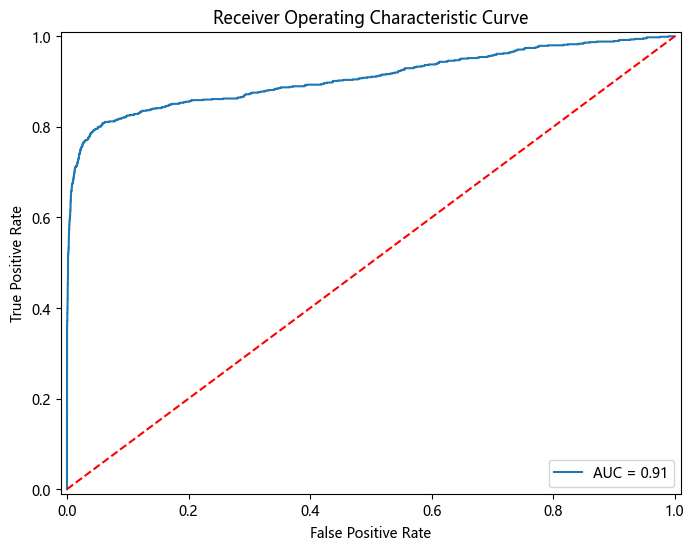

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import joblib
import pandas as pd
from sklearn import metrics

data = pd.read_table('dataset13.txt', sep='\t')
y = data['Default'].values
x = data.drop(['Default'], axis=1).values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=33, stratify=y)

# 使用 LogisticRegression 训练模型
lr = LogisticRegression()
lr.fit(x_train, y_train)

# 保存模型
joblib.dump(lr, "train_model.m")

# 加载模型
lr = joblib.load("train_model.m")
y_predict_proba = lr.predict_proba(x_test)
y_predict = lr.predict_proba(x_test)[:, 1]

# 用metrics.roc_curve()求出 fpr, tpr, threshold
fpr, tpr, threshold = metrics.roc_curve(y_test, y_predict)

# 用metrics.auc求出roc_auc的值
roc_auc = metrics.auc(fpr, tpr)

# 将图片大小设为8:6
fig, ax = plt.subplots(figsize=(8, 6))

# 将plt.plot里的内容填写完整
plt.plot(fpr, tpr, label='AUC = %0.2f' % roc_auc)

# 将图例显示在右下方
plt.legend(loc='lower right')

# 画出一条红色对角虚线
plt.plot([0, 1], [0, 1], 'r--')

# 设置横纵坐标轴范围
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])

# 设置横纵名称以及图形名称
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.show()

## 7.4 利用KS值评估逻辑回归模型准确性 

接下来我们使用KS值来评估逻辑回归模型准确性。KS值通过测量模型对违约和未违约客户的区分能力来评估模型的准确性，计算公式如下: 

![](https://ai-studio-static-online.cdn.bcebos.com/bcc7bd534f9145ee89483af2c3fe1e89f25b7cfa62544f9faae7c5c03d2c5083)

其中TPR表示真正率，FPR表示假正率。其中KS值越大表示模型的风险区分能力越强，不同KS值的解释经验表如下：

![](https://ai-studio-static-online.cdn.bcebos.com/ad5d8004bcba43fc97ad5dfc9b8486ae63396b228fcc4eb5b54c24abfd6fedfd)

在第六部分中，我们已经计算出了不同阈值threshold下的假正率和真正率，现在我们试着绘制出KS曲线并用上述公式计算出KS值。


![](https://ai-studio-static-online.cdn.bcebos.com/0b9293c53bb944c4afc0e084b7192590b0a0e884877a4bb6aca29c2196fa1fa1)

## 实训任务

- 求出KS值ks和其所对应的阈值thre
- 将画两条曲线的代码plt.plot填写完整。

KS值： 74.98 % 阈值： 0.13


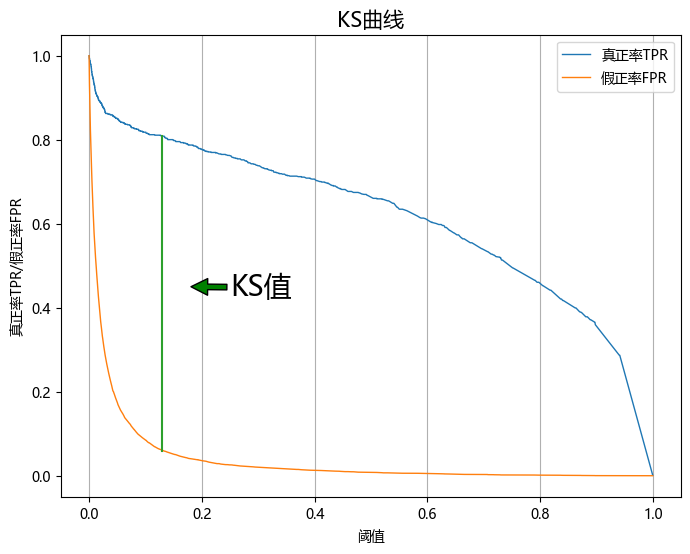

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
import joblib
from sklearn import metrics
import matplotlib
matplotlib.rc("font", family="Microsoft YaHei")

data = pd.read_table('dataset13.txt', sep='\t')
y = data['Default'].values
x = data.drop(['Default'], axis=1).values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=33, stratify=y)

lr1 = joblib.load('train_model.m')
y_predict = lr1.predict_proba(x_test)[:, 1]

# 用metrics.roc_curve()求出 fpr, tpr, threshold
fpr, tpr, threshold = metrics.roc_curve(y_test, y_predict)

# 求出KS值和相应的阈值
ks = max(tpr - fpr)
thre = threshold[(tpr - fpr).argmax()]

ks = round(ks * 100, 2)
thre = round(thre, 2)
print('KS值：', ks, '%', '阈值：', thre)

# 将图片大小设为8:6
fig = plt.figure(figsize=(8, 6))

# 将plt.plot里的内容填写完整
plt.plot(threshold, tpr, lw=1, alpha=1, label='真正率TPR')
plt.plot(threshold, fpr, lw=1, alpha=1, label='假正率FPR')

# 画出KS值的直线
ks_tpr = tpr[abs(tpr - fpr).argmax()]
ks_fpr = fpr[abs(tpr - fpr).argmax()]
x1 = [thre, thre]
x2 = [ks_fpr, ks_tpr]
plt.plot(x1, x2)

# 设置横纵名称以及图例
plt.xlabel('阈值')
plt.ylabel('真正率TPR/假正率FPR')
plt.title('KS曲线', fontsize=15)
plt.legend(loc="upper right")
plt.grid(axis='x')

# 在图上标注ks值
plt.annotate('KS值', xy=(0.18, 0.45), xytext=(0.25, 0.43),
             fontsize=20, arrowprops=dict(facecolor='green', shrink=0.01))

plt.show()

## 7.5 利用KS值评估随机森林模型准确性 

接下来我们使用KS值来评估随机森林模型准确性。KS值通过测量模型对违约和未违约客户的区分能力来评估模型的准确性，计算公式如下: 

![](https://ai-studio-static-online.cdn.bcebos.com/6f5ab866bb9a487397bcb2f3e0369995ae0d3b692ae74c7cbd44b40d6ef679dd)

其中TPR表示真正率，FPR表示假正率。其中KS值越大表示模型的风险区分能力越强，不同KS值的解释经验表如下：

![](https://ai-studio-static-online.cdn.bcebos.com/110a2620ac3d499097e51cd630272c2de7b5f9b7b53b4d69b0e9da33f0e78b81)

在第六部分中，我们已经计算出了不同阈值threshold下的假正率和真正率，现在我们试着绘制出KS曲线并用上述公式计算出KS值。



## 实训任务

- 求出KS值ks和其所对应的阈值thre
- 将画两条曲线的代码plt.plot填写完整。

In [24]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import joblib
from sklearn import metrics

data = pd.read_table('dataset13.txt', sep='\t')

y = data['Default'].values
x = data.drop(['Default'], axis=1).values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=33, stratify=y)

rf_clf = joblib.load("train_model2.m")
y_predict = rf_clf.predict_proba(x_test)[:, 1]

# 用metrics.roc_curve()求出 fpr, tpr, threshold
fpr, tpr, threshold = metrics.roc_curve(y_test, y_predict)

# 求出KS值和相应的阈值
ks = max(tpr - fpr)
thre = threshold[(tpr - fpr).argmax()]

ks = round(ks * 100, 2)
thre = round(thre, 2)
print('KS值：', ks, '%', '阈值：', thre)

# 将图片大小设为8:6
fig = plt.figure(figsize=(8, 6))

# 将plt.plot里的内容填写完整
plt.plot(threshold, tpr, lw=1, alpha=1, label='真正率TPR')
plt.plot(threshold, fpr, lw=1, alpha=1, label='假正率FPR')

# 画出KS值的直线
ks_tpr = tpr[abs(tpr - fpr).argmax()]
ks_fpr = fpr[abs(tpr - fpr).argmax()]
x1 = [thre, thre]
x2 = [ks_fpr, ks_tpr]
plt.plot(x1, x2)

# 设置横纵名称以及图例
plt.xlabel('阈值')
plt.ylabel('真正率TPR/假正率FPR')
plt.title('KS曲线', fontsize=15)
plt.legend(loc="upper right")
plt.grid(axis='x')

# 在图上标注ks值
plt.annotate('KS值', xy=(0.26, 0.45), xytext=(0.30, 0.43),
             fontsize=20, arrowprops=dict(facecolor='green', shrink=0.01))

plt.show()

ModuleNotFoundError: No module named 'sklearn.ensemble.forest'